In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

**read the user dataset**

In [9]:
import pandas as pd
users=pd.read_csv("Users.csv")

In [10]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


**read the books dataset**

In [16]:
books=pd.read_csv("Books.csv",low_memory=False)

In [17]:
books.drop(['Image-URL-S',	'Image-URL-M',	'Image-URL-L'],axis=1,inplace=True)

In [18]:
books.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


**read the rate dataset**

In [20]:
rate=pd.read_csv("Ratings.csv")

In [21]:
rate.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**remove the duplicate values**

In [22]:
books.drop_duplicates(keep='last', inplace=True)
books.reset_index(drop = True, inplace = True)

In [23]:
rate.drop_duplicates(keep='last', inplace=True)
rate.reset_index(drop = True, inplace = True)


In [24]:
users.drop_duplicates(keep='last', inplace=True)


**fill all the NaN values**

In [25]:
books["Year-Of-Publication"]=books["Year-Of-Publication"].fillna('2000')

In [26]:
x=users.copy()

In [27]:
x["Age"].mean()

34.75143370454978

In [28]:

users["Age"].fillna("35",inplace=True)

In [29]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",35
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",35
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",35


**find the sum of null values to ensure that all NaN values have been filled**

In [30]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [31]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [32]:
books=books.fillna("Other")

In [33]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [34]:
rate.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

**to ensure that all duplicate rows have been removed**

In [35]:
users.duplicated().sum()

0

In [36]:


books.duplicated().sum()

0

In [37]:
rate.duplicated().sum()

0

**merging all the three datasets**

In [38]:
dataset = pd.merge(books, rate, on='ISBN', how='inner')
dataset = pd.merge(dataset, users, on='User-ID', how='inner')
dataset.head(100)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",35
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada",35
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,"timmins, ontario, canada",35
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",35
...,...,...,...,...,...,...,...,...,...
95,0671888587,I'll Be Seeing You,Mary Higgins Clark,1994,Pocket,11676,8,"n/a, n/a, n/a",35
96,0553582747,From the Corner of His Eye,Dean Koontz,2001,Bantam Books,11676,7,"n/a, n/a, n/a",35
97,0425182908,Isle of Dogs,Patricia Cornwell,2002,Berkley Publishing Group,11676,0,"n/a, n/a, n/a",35
98,042518630X,Purity in Death,J.D. Robb,2002,Berkley Publishing Group,11676,10,"n/a, n/a, n/a",35


In [39]:
dataset.shape

(1031136, 9)

In [40]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import re
import random
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

**plotting the author vs number of books published**

Text(0.5, 1.0, 'No of books by an author')

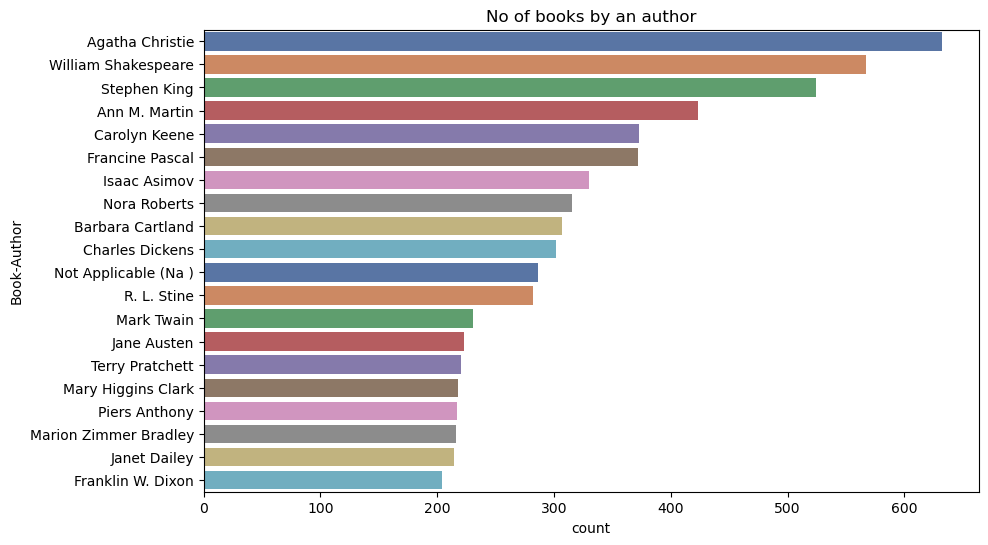

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:20],palette="deep")
plt.title("No of books by an author")

**plotting the book vs number of ratings**

Text(0.5, 1.0, 'No.of ratings')

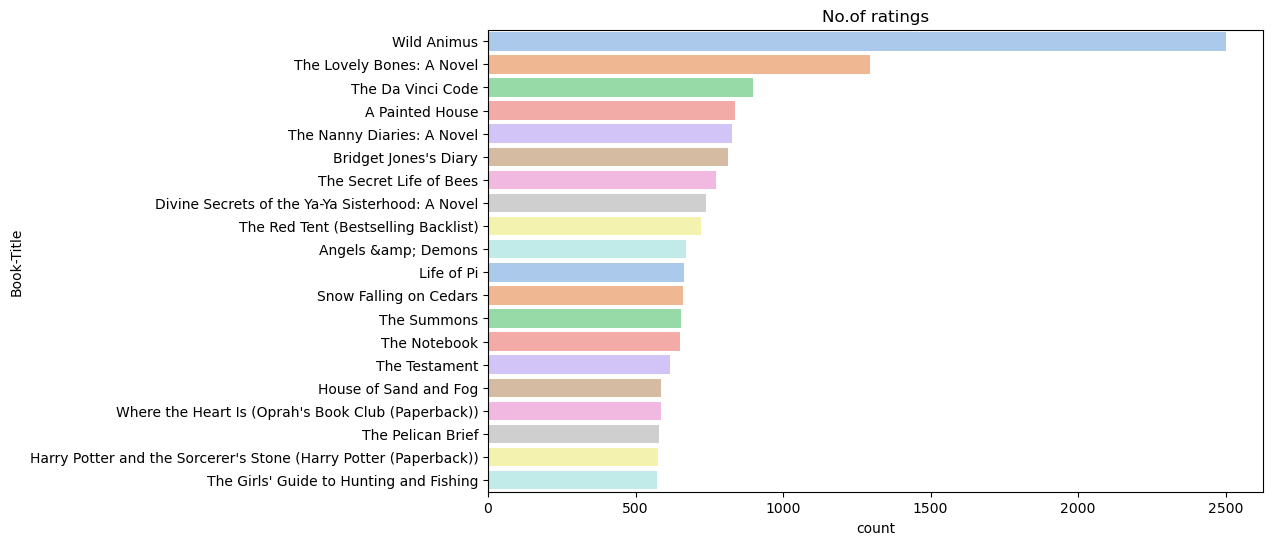

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(y="Book-Title", data=dataset, order=dataset['Book-Title'].value_counts().index[0:20],palette="pastel")
plt.title("No.of ratings")

In [43]:
dataset[['Book-Title',"Book-Author","ISBN","User-ID"]].duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1031131    False
1031132    False
1031133    False
1031134    False
1031135    False
Length: 1031136, dtype: bool

**Reccommendation System using Content Based Filtering**

**Creating the function**

In [44]:
def content_based(bookTitle):
    bookTitle=str(bookTitle)

    if bookTitle in dataset["Book-Title"].values:
        rating_count=pd.DataFrame(dataset["Book-Title"].value_counts())
        rare_books=rating_count[rating_count["Book-Title"]<=10].index
        common_books=dataset[~dataset["Book-Title"].isin(rare_books)]

        if bookTitle in rare_books:
            print("No Recommendations for this Book \n ")
        else:
            common_books=common_books.drop_duplicates(subset=["Book-Title"])
            common_books.reset_index(inplace=True)
            common_books["index"]=[i for i in range(common_books.shape[0])]
            targets=["Book-Title","Book-Author","Publisher"]
            common_books["all_features"] = [" ".join(common_books[targets].iloc[i,].values) for i in range(common_books[targets].shape[0])]
            vectorizer=CountVectorizer()
            common_booksVector=vectorizer.fit_transform(common_books["all_features"])
            similarity=cosine_similarity(common_booksVector)
            index=common_books[common_books["Book-Title"]==bookTitle]["index"].values[0]
            similar_books=list(enumerate(similarity[index]))
            similar_booksSorted=sorted(similar_books,key=lambda x:x[1],reverse=True)[1:6]
            books=[]
            for i in range(len(similar_booksSorted)):
                books.append(common_books[common_books["index"]==similar_booksSorted[i][0]]["Book-Title"].item())
            print("Here are books you may like")
            for j in range(len(books)):
              print(books[j])


    else:
        print("Could not find book")

In [50]:
content_based("Circle of Friends")

Here are books you may like
Echoes
Evening Class
Silver Wedding
Firefly Summer
The Glass Lake


In [46]:
content_based("The Da Vinci Code")

Here are books you may like
El Codigo Da Vinci / The Da Vinci Code
Cracking the Da Vinci Code : The Unauthorized Guide to the Facts Behind Dan Brown's Bestselling Novel
The Da Vinci Legacy
Colors of the Mountain
The Catcher in the Rye


In [47]:
content_based("Wild Animus")

Here are books you may like
Gone Too Far
Casual Day Has Gone Too Far
Too Much Too Soon
Wild
Hound Of The Far Side (Far Side Books, Collection No 7)


In [48]:
content_based("Harry Potter and the Sorcerer's Stone (Book 1)")

Here are books you may like
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


In [51]:
import pickle

In [57]:
pickle.dump(dataset.to_dict,open("books_dict.pkl","wb"))

In [53]:
dataset["Book-Title"].values

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Rimas y leyendas (ClÃ¡sicos Fraile ; 3)',
       'Anglo-American Cataloguing Rules', 'Texte zur Ethik.'],
      dtype=object)

In [54]:
dataset.to_dict()

{'ISBN': {0: '0195153448',
  1: '0002005018',
  2: '0060973129',
  3: '0374157065',
  4: '0393045218',
  5: '0399135782',
  6: '0425176428',
  7: '0671870432',
  8: '0679425608',
  9: '074322678X',
  10: '0771074670',
  11: '080652121X',
  12: '0887841740',
  13: '1552041778',
  14: '1558746218',
  15: '1567407781',
  16: '1575663937',
  17: '1881320189',
  18: '0002005018',
  19: '0786868716',
  20: '0151008116',
  21: '0671021001',
  22: '0312195516',
  23: '0446364193',
  24: '0316789089',
  25: '0440211727',
  26: '0553582658',
  27: '0743418174',
  28: '0060175532',
  29: '0312305060',
  30: '0060958022',
  31: '0425116840',
  32: '0375727345',
  33: '0312274920',
  34: '0446606324',
  35: '0345445856',
  36: '0449003981',
  37: '0440222656',
  38: '0743225325',
  39: '0375506039',
  40: '0060512822',
  41: '0140126562',
  42: '0671673203',
  43: '0312950098',
  44: '0446892041',
  45: '0142001309',
  46: '0802133347',
  47: '0888992211',
  48: '1553663950',
  49: '0440401607',
  